In [2]:
!pip install torch==1.11.0 torchvision==0.12.0

In [3]:
from PIL import Image
from torchvision.transforms.functional import pil_to_tensor
import json

In [4]:
with open('/content/drive/MyDrive/data/train.jsonl', 'r') as jsonl_file:
    data = []
    for line in jsonl_file:
        data.append(json.loads(line))

data

[{'id': 42953,
  'img': 'img/42953.png',
  'label': 0,
  'text': 'its their character not their color that matters'},
 {'id': 23058,
  'img': 'img/23058.png',
  'label': 0,
  'text': "don't be afraid to love again everyone is not like your ex"},
 {'id': 13894,
  'img': 'img/13894.png',
  'label': 0,
  'text': 'putting bows on your pet'},
 {'id': 37408,
  'img': 'img/37408.png',
  'label': 0,
  'text': 'i love everything and everybody! except for squirrels i hate squirrels'},
 {'id': 82403,
  'img': 'img/82403.png',
  'label': 0,
  'text': 'everybody loves chocolate chip cookies, even hitler'},
 {'id': 16952,
  'img': 'img/16952.png',
  'label': 0,
  'text': 'go sports! do the thing! win the points!'},
 {'id': 76932,
  'img': 'img/76932.png',
  'label': 0,
  'text': "fine you're right. now can we fucking drop it?"},
 {'id': 70914,
  'img': 'img/70914.png',
  'label': 0,
  'text': 'tattoos are bad for your health i know 5 million people that had tattoos and they all died'},
 {'id': 2973,

In [5]:
toy_data = data[:1500]

In [6]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn

object_detection_model = fasterrcnn_resnet50_fpn(pretrained=True, progress=False)

object_detection_model.eval();

In [7]:
for i in toy_data:
  img1 = Image.open(f"/content/drive/MyDrive/data/" + str(i['img']) )
  img1_tensor_int = pil_to_tensor(img1)
  img1_tensor_int = img1_tensor_int.unsqueeze(dim=0)
  img1_tensor_float = img1_tensor_int / 255.0
  try:
    img1_preds = object_detection_model(img1_tensor_float)
  except:
    toy_data.remove(i)
    continue

  i['objects'] = img1_preds[0]['labels'][img1_preds[0]["scores"] > 0.3].tolist()
  i['scores'] = img1_preds[0]['scores'][img1_preds[0]["scores"] > 0.3].tolist()
  i['boxes'] = img1_preds[0]['boxes'][img1_preds[0]["scores"] > 0.3].tolist()

  print(i)


with open("/content/drive/MyDrive/data/objects.jsonl", 'w') as file:
    for item in toy_data:
        file.write(json.dumps(item) + '\n')



{'id': 42953, 'img': 'img/42953.png', 'label': 0, 'text': 'its their character not their color that matters', 'objects': [1, 1, 1], 'scores': [0.9954918026924133, 0.9733631610870361, 0.7773519158363342], 'boxes': [[13.880505561828613, 32.26198959350586, 219.70718383789062, 204.80801391601562], [45.25739669799805, 209.12583923339844, 262.7234802246094, 398.2442321777344], [4.221992015838623, 74.795654296875, 250.05267333984375, 395.8265686035156]]}
{'id': 23058, 'img': 'img/23058.png', 'label': 0, 'text': "don't be afraid to love again everyone is not like your ex", 'objects': [1, 32, 1, 1, 32, 1, 32], 'scores': [0.9990717172622681, 0.9818705320358276, 0.9681283831596375, 0.7755596041679382, 0.45362386107444763, 0.37186768651008606, 0.33684390783309937], 'boxes': [[375.34735107421875, 33.696266174316406, 747.4154663085938, 525.2023315429688], [449.04217529296875, 273.0218505859375, 496.2718200683594, 393.2304992675781], [109.67675018310547, 155.26283264160156, 432.1748962402344, 527.588

In [15]:
import json
with open('objects.jsonl', 'r') as jsonl_file:
    data = []
    for line in jsonl_file:
        data.append(json.loads(line))

data

[{'id': 42953,
  'img': 'img/42953.png',
  'label': 0,
  'text': 'its their character not their color that matters',
  'objects': [1, 1, 1],
  'scores': [0.9954918026924133, 0.9733631610870361, 0.7773519158363342],
  'boxes': [[13.880505561828613,
    32.26198959350586,
    219.70718383789062,
    204.80801391601562],
   [45.25739669799805,
    209.12583923339844,
    262.7234802246094,
    398.2442321777344],
   [4.221992015838623,
    74.795654296875,
    250.05267333984375,
    395.8265686035156]]},
 {'id': 23058,
  'img': 'img/23058.png',
  'label': 0,
  'text': "don't be afraid to love again everyone is not like your ex",
  'objects': [1, 32, 1, 1, 32, 1, 32],
  'scores': [0.9990717172622681,
   0.9818705320358276,
   0.9681283831596375,
   0.7755596041679382,
   0.45362386107444763,
   0.37186768651008606,
   0.33684390783309937],
  'boxes': [[375.34735107421875,
    33.696266174316406,
    747.4154663085938,
    525.2023315429688],
   [449.04217529296875,
    273.0218505859375,


In [16]:
final2 =[]
for i in data:
    object_scores_labels=[]
    try:
        for obj, score in zip(i['objects'], i['scores']):
            object_scores_labels.append({'object': obj, 'score': score, 'label':i['label']})
        final2.append(object_scores_labels)
    except:
        continue
final2

[[{'object': 1, 'score': 0.9954918026924133, 'label': 0},
  {'object': 1, 'score': 0.9733631610870361, 'label': 0},
  {'object': 1, 'score': 0.7773519158363342, 'label': 0}],
 [{'object': 1, 'score': 0.9990717172622681, 'label': 0},
  {'object': 32, 'score': 0.9818705320358276, 'label': 0},
  {'object': 1, 'score': 0.9681283831596375, 'label': 0},
  {'object': 1, 'score': 0.7755596041679382, 'label': 0},
  {'object': 32, 'score': 0.45362386107444763, 'label': 0},
  {'object': 1, 'score': 0.37186768651008606, 'label': 0},
  {'object': 32, 'score': 0.33684390783309937, 'label': 0}],
 [{'object': 17, 'score': 0.9857814908027649, 'label': 0},
  {'object': 17, 'score': 0.9731019735336304, 'label': 0}],
 [{'object': 18, 'score': 0.9986605644226074, 'label': 0},
  {'object': 18, 'score': 0.9864596128463745, 'label': 0}],
 [{'object': 1, 'score': 0.9658832550048828, 'label': 0},
  {'object': 32, 'score': 0.9460780024528503, 'label': 0},
  {'object': 32, 'score': 0.7968820333480835, 'label': 0}

In [17]:
averages = []
for lst in final2:
    scores_per_object = {}
    counts_per_object = {}
    labels_per_object = {}
    for item in lst:
        obj = item['object']
        score = item['score']
        label = item['label']
        if obj in scores_per_object:
            scores_per_object[obj] += score
            counts_per_object[obj] += 1
        else:
            scores_per_object[obj] = score
            counts_per_object[obj] = 1
            labels_per_object[obj] = label
    
        avg_scores = [{'object': obj, 'avg_score': scores_per_object[obj] / counts_per_object[obj], 'label': labels_per_object[obj]} for obj in scores_per_object]
    averages.append(avg_scores)
# Print the average scores per object within each list
print(averages)

[[{'object': 1, 'avg_score': 0.9154022932052612, 'label': 0}], [{'object': 1, 'avg_score': 0.7786568477749825, 'label': 0}, {'object': 32, 'avg_score': 0.5907794336477915, 'label': 0}], [{'object': 17, 'avg_score': 0.9794417321681976, 'label': 0}], [{'object': 18, 'avg_score': 0.992560088634491, 'label': 0}], [{'object': 1, 'avg_score': 0.9658832550048828, 'label': 0}, {'object': 32, 'avg_score': 0.8714800179004669, 'label': 0}], [{'object': 1, 'avg_score': 0.6419578481603552, 'label': 0}, {'object': 62, 'avg_score': 0.511212170124054, 'label': 0}, {'object': 73, 'avg_score': 0.3930637240409851, 'label': 0}], [{'object': 18, 'avg_score': 0.5999090224504471, 'label': 0}, {'object': 20, 'avg_score': 0.5270203351974487, 'label': 0}, {'object': 21, 'avg_score': 0.4301253855228424, 'label': 0}], [{'object': 1, 'avg_score': 0.6007507741451263, 'label': 0}], [{'object': 18, 'avg_score': 0.9692073464393616, 'label': 0}], [{'object': 51, 'avg_score': 0.8017971515655518, 'label': 0}, {'object': 

In [18]:
import pandas as pd
data_list = []

for lst in averages:
    for item in lst:
        data_list.append({'object': item['object'], 'avg_score': item['avg_score'], 'label': item['label']})

df = pd.DataFrame(data_list)

# Summary statistics
summary_stats = df.groupby(['label', 'object']).agg({'avg_score': ['mean', 'std']}).reset_index()

In [19]:
print(summary_stats)

    label object avg_score          
                      mean       std
0       0      1  0.832584  0.158226
1       0      2  0.663498  0.180166
2       0      3  0.651317  0.179972
3       0      4  0.540823  0.148102
4       0      5  0.664818  0.275782
..    ...    ...       ...       ...
151     1     85  0.570055  0.218892
152     1     86  0.590377  0.206678
153     1     87  0.407602  0.063663
154     1     88  0.489100  0.177643
155     1     90  0.538796  0.208842

[156 rows x 4 columns]


In [20]:
df_pivot = df.pivot_table(index='object', columns='label', values='avg_score', aggfunc='mean', fill_value=0)
df_pivot['prob_label_0'] = df_pivot[0] / (df_pivot[0] + df_pivot[1])
df_pivot['prob_label_1'] = df_pivot[1] / (df_pivot[0] + df_pivot[1])

print(df_pivot[['prob_label_0', 'prob_label_1']])


label   prob_label_0  prob_label_1
object                            
1           0.501005      0.498995
2           0.542863      0.457137
3           0.511382      0.488618
4           0.523238      0.476762
5           0.541003      0.458997
...              ...           ...
86          0.543480      0.456520
87          0.533325      0.466675
88          0.570362      0.429638
89          1.000000      0.000000
90          0.510151      0.489849

[80 rows x 2 columns]


In [23]:
df_pivot.to_excel('table_probabilities.xlsx')

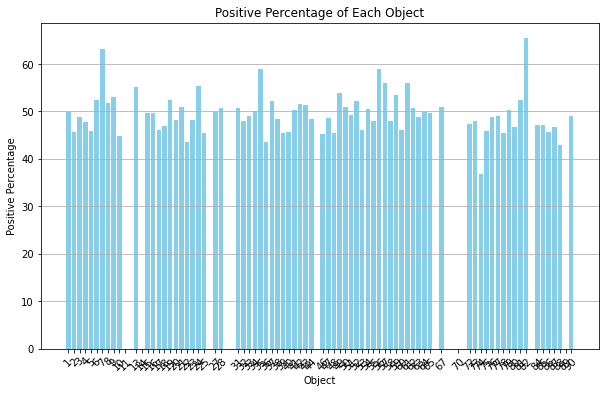

In [24]:
import matplotlib.pyplot as plt

# Calculate positive percentage for each object
df_pivot['positive_percentage'] = df_pivot['prob_label_1'] * 100

# Plotting positive percentage for each object
plt.figure(figsize=(10, 6))
plt.bar(df_pivot.index, df_pivot['positive_percentage'], color='skyblue')
plt.xlabel('Object')
plt.ylabel('Positive Percentage')
plt.title('Positive Percentage of Each Object')
plt.xticks(df_pivot.index)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

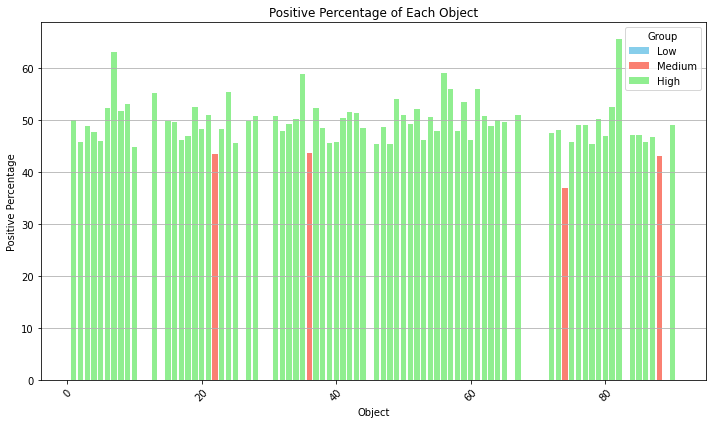

In [25]:
df_pivot['group'] = pd.cut(df_pivot['positive_percentage'], bins=3, labels=['Low', 'Medium', 'High'])

# Plotting positive percentage for each object with different colors for each group
plt.figure(figsize=(10, 6))
for group, color in zip(['Low', 'Medium', 'High'], ['skyblue', 'salmon', 'lightgreen']):
    group_df = df_pivot[df_pivot['group'] == group]
    plt.bar(group_df.index, group_df['positive_percentage'], color=color, label=group)

plt.xlabel('Object')
plt.ylabel('Positive Percentage')
plt.title('Positive Percentage of Each Object')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees
plt.legend(title='Group')
plt.grid(axis='y')
plt.tight_layout()
plt.show()